In [2]:
### Importing pandas to explore the tabular datasets.
### Import sqlite 
import pandas as pd
import sqlite3
conn = sqlite3.connect('ecommerce.db')
cursor = conn.cursor()


## Loading and Exploring the dataset, there are 9 files, starting with the most relevent ones for understanding sales data

### Why Focus on These Files?

Orders: The backbone of sales data, showing what was ordered and when.

Order Items: Details what was sold and at what price.

Products: Adds context with product categories.

In [4]:
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

In [6]:
print(orders.head())
print(order_items.head())
print(products.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [8]:
print(orders.info())
print(order_items.info())
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  ob

### Dataset Structure Observations
#### Orders (99,441 rows, 8 columns)
- Timestamps are strings, need to convert to datetime.
- Missing values in delivery columns: 2,965 orders lack delivery date.
- Most orders are 'delivered'.

#### Order Items (112,650 rows, 7 columns)
- No missing values.
- Price and freight value are numeric, ready for calculations.
- Each row represents one item per order (order_item_id=1 in sample).

#### Products (32,951 rows, 9 columns)
- 610 products missing category and description details.
- Categories in Portuguese, need translation.
- Dimensions vary, useful for shipping analysis.
  

### Identify Key Relationships:
#### From the .head() outputs, we can see:
order_id links orders and order_items (e.g., order_id in orders matches order_id in order_items).
product_id connects order_items and products (e.g., product_id in order_items matches product_id in products).

### Merge Datasets

In [13]:
### Merge order_items with products to get product details for each item sold:

items_with_products = pd.merge(order_items, products, on='product_id')
print(items_with_products[['order_id', 'product_id', 'product_category_name', 'price']].head())


                           order_id                        product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2  000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3  00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4  00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   

  product_category_name   price  
0            cool_stuff   58.90  
1              pet_shop  239.90  
2      moveis_decoracao  199.00  
3            perfumaria   12.99  
4    ferramentas_jardim  199.90  


In [15]:
### Merge the result with orders to include order details:

sales_data = pd.merge(items_with_products, orders, on='order_id')
print(sales_data[['order_id', 'product_category_name', 'price', 'order_status']].head())

                           order_id product_category_name   price order_status
0  00010242fe8c5a6d1ba2dd792cb16214            cool_stuff   58.90    delivered
1  00018f77f2f0320c557190d7a144bdd3              pet_shop  239.90    delivered
2  000229ec398224ef6ca0657da4fc703e      moveis_decoracao  199.00    delivered
3  00024acbcdf0a6daa1e931b038114c75            perfumaria   12.99    delivered
4  00042b26cf59d7ce69dfabb4e55b4fd9    ferramentas_jardim  199.90    delivered


### Dataset Relationships
- `orders` and `order_items` are linked by `order_id`.
- `order_items` and `products` are linked by `product_id`.
- Merged all three datasets to create a `sales_data` DataFrame for analysis.

In [40]:
!brew install sqlite

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 3 taps (homebrew/services, homebrew/core and homebrew/cask).
==> New Formulae
adaptivecpp                              icu4c@77
alloy                                    is-fast
anubis                                   jaguar
anyquery                                 keyutils
block-goose-cli                          krep
cargo-sort                               ktexttemplate
cargo-spellcheck                         lavat
cpp-lazy                                 leetgo
darklua                                  libgoa
decompose                                libgudev
dish                                     lld@19
dockcheck                                llvm@19
easyeda2kicad                            lume
ente-cli                                 mcpm
excalidraw-con

In [44]:
!brew reinstall sqlite

==> Downloading https://ghcr.io/v2/homebrew/core/sqlite/manifests/3.49.1
Already downloaded: /Users/ankitchoubey/Library/Caches/Homebrew/downloads/ce3cf24bf33f0eff2d169e046ba5da3ec75ab9fe0439e7b7face44f42e033fcb--sqlite-3.49.1.bottle_manifest.json
==> Fetching sqlite
==> Downloading https://ghcr.io/v2/homebrew/core/sqlite/blobs/sha256:e716021f048
Already downloaded: /Users/ankitchoubey/Library/Caches/Homebrew/downloads/c10387eb2d8cbb3a6d934bd01b19fccd08c401be3d0f629dbe0ba4364d8b040e--sqlite--3.49.1.sequoia.bottle.tar.gz
==> Reinstalling sqlite 
==> Pouring sqlite--3.49.1.sequoia.bottle.tar.gz
🍺  /usr/local/Cellar/sqlite/3.49.1: 13 files, 4.6MB
==> Running `brew cleanup sqlite`...
Disable this behaviour by setting HOMEBREW_NO_INSTALL_CLEANUP.
Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).


In [50]:
!sqlite3 --version

3.45.3 2024-04-15 13:34:05 8653b758870e6ef0c98d46b3ace27849054af85da891eb121e9aaa537f1e8355 (64-bit)


## Data Manipulation

In [18]:
products_sample = products.head(100)
products_sample.to_sql('products', conn, if_exists='replace', index=False)

100

In [20]:
cursor = conn.cursor()  ### Cursor to execute queries

In [22]:
cursor.execute("SELECT * FROM products LIMIT 5")
print(cursor.fetchall())

[('1e9e8ef04dbcff4541ed26657ea517e5', 'perfumaria', 40.0, 287.0, 1.0, 225.0, 16.0, 10.0, 14.0), ('3aa071139cb16b67ca9e5dea641aaa2f', 'artes', 44.0, 276.0, 1.0, 1000.0, 30.0, 18.0, 20.0), ('96bd76ec8810374ed1b65e291975717f', 'esporte_lazer', 46.0, 250.0, 1.0, 154.0, 18.0, 9.0, 15.0), ('cef67bcfe19066a932b7673e239eb23d', 'bebes', 27.0, 261.0, 1.0, 371.0, 26.0, 4.0, 26.0), ('9dc1a7de274444849c219cff195d0b71', 'utilidades_domesticas', 37.0, 402.0, 4.0, 625.0, 20.0, 17.0, 13.0)]


In [24]:
# Query 2: Select specific columns
cursor.execute("SELECT product_id, product_category_name FROM products WHERE product_photos_qty > 2")
print(cursor.fetchall())

[('9dc1a7de274444849c219cff195d0b71', 'utilidades_domesticas'), ('732bd381ad09e530fe0a5f457d81becb', 'cool_stuff'), ('03b63c5fc16691530586ae020c345514', 'bebes'), ('cf55509ea8edaaac1d28fdb16e48fc22', 'instrumentos_musicais'), ('eb31436580a610f202c859463d8c7415', 'construcao_ferramentas_seguranca'), ('1c1890ba1779090cd54008a3c3302921', 'moveis_decoracao'), ('e3e020af31d4d89d2602272b315c3f6e', 'beleza_saude'), ('f6574524b07d5bb753bab6f35abe2d06', 'malas_acessorios'), ('e1d1d22e9f8122a4ec1533b032c12562', 'ferramentas_jardim'), ('ce5b91848b91118daffb3af53b747475', 'esporte_lazer'), ('5370b82a213393979691c98074265584', 'bebes'), ('db46052aed7dff59ba38cf2fe29b87f9', 'cama_mesa_banho'), ('b864b103180d5a6a3f830e67f93e8735', 'bebes'), ('83b9bc6aae6f527ff6aafb9e01d6cbf3', 'brinquedos'), ('5f504b3a1c75b73d6151be81eb05bdc9', 'cool_stuff'), ('5eaa343860dc445b3fd43d1b682809fd', 'esporte_lazer'), ('3fcd8dfe610c62edfb51de2630cd9ef4', 'bebes'), ('1065dbb6b0bf03daaedab1236979e296', 'papelaria'), ('0d826

In [26]:
# Query 3: Count products by category
cursor.execute("SELECT product_category_name, COUNT(*) FROM products GROUP BY product_category_name")
print(cursor.fetchall())

[('agro_industria_e_comercio', 1), ('artes', 1), ('automotivo', 5), ('bebes', 6), ('beleza_saude', 8), ('brinquedos', 4), ('cama_mesa_banho', 9), ('casa_construcao', 1), ('construcao_ferramentas_construcao', 1), ('construcao_ferramentas_seguranca', 1), ('cool_stuff', 6), ('eletrodomesticos', 1), ('eletronicos', 1), ('eletroportateis', 1), ('esporte_lazer', 9), ('fashion_bolsas_e_acessorios', 1), ('fashion_calcados', 1), ('ferramentas_jardim', 3), ('informatica_acessorios', 4), ('instrumentos_musicais', 3), ('malas_acessorios', 2), ('moveis_decoracao', 12), ('moveis_escritorio', 1), ('papelaria', 4), ('pcs', 1), ('perfumaria', 4), ('pet_shop', 1), ('relogios_presentes', 3), ('telefonia', 2), ('utilidades_domesticas', 3)]


### SQL Practice
- `SELECT * FROM products LIMIT 5`: Fetches first 5 rows.
- `SELECT product_id, product_category_name WHERE product_photos_qty > 2`: Filters products with more than 2 photos.
- `SELECT product_category_name, COUNT(*) GROUP BY product_category_name`: Counts products per category.

### Explore Relationships Between Datasets with Pandas

In [30]:
## Merge 'order_items' with 'products' to get product details for each item sold:
items_with_products = pd.merge(order_items, products, on='product_id')
print(items_with_products[['order_id', 'product_id', 'product_category_name', 'price']].head())

                           order_id                        product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2  000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3  00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4  00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   

  product_category_name   price  
0            cool_stuff   58.90  
1              pet_shop  239.90  
2      moveis_decoracao  199.00  
3            perfumaria   12.99  
4    ferramentas_jardim  199.90  


In [32]:
### Merge the result with orders to include order details

sales_data = pd.merge(items_with_products, orders, on='order_id')
print(sales_data[['order_id', 'product_category_name', 'price', 'order_status']].head())

                           order_id product_category_name   price order_status
0  00010242fe8c5a6d1ba2dd792cb16214            cool_stuff   58.90    delivered
1  00018f77f2f0320c557190d7a144bdd3              pet_shop  239.90    delivered
2  000229ec398224ef6ca0657da4fc703e      moveis_decoracao  199.00    delivered
3  00024acbcdf0a6daa1e931b038114c75            perfumaria   12.99    delivered
4  00042b26cf59d7ce69dfabb4e55b4fd9    ferramentas_jardim  199.90    delivered


#### Basic Analysis

In [35]:
revenue_by_category = sales_data.groupby('product_category_name')['price'].sum().sort_values(ascending=False)
print(revenue_by_category.head())

product_category_name
beleza_saude              1258681.34
relogios_presentes        1205005.68
cama_mesa_banho           1036988.68
esporte_lazer              988048.97
informatica_acessorios     911954.32
Name: price, dtype: float64


In [37]:
print(sales_data['order_status'].value_counts())

order_status
delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: count, dtype: int64


### Dataset Relationships
- Merged `order_items` with `products` on `product_id`.
- Merged with `orders` on `order_id`.
- Top revenue categories: [list top 5 from output].
- Most orders are 'delivered'.

In [40]:
delivered_expensive = sales_data[(sales_data['order_status']== 'delivered') & (sales_data['price']>100)]
print(delivered_expensive[['order_id','product_category_name', 'price']].head())

                           order_id product_category_name   price
1  00018f77f2f0320c557190d7a144bdd3              pet_shop  239.90
2  000229ec398224ef6ca0657da4fc703e      moveis_decoracao  199.00
4  00042b26cf59d7ce69dfabb4e55b4fd9    ferramentas_jardim  199.90
7  000576fe39319847cbb9d288c5617fa6    ferramentas_jardim  810.00
8  0005a1a1728c9d785b8e2b08b904576c          beleza_saude  145.95


### SQL Concepts in Pandas
- Filtering: Used `sales_data[(condition)]` to mimic `WHERE`.
- Grouping: Used `groupby()` to mimic `GROUP BY`.
- Joining: Used `pd.merge()` to mimic `JOIN`.

In [43]:
conn.close()

### Day 1 Summary
- Explored `orders`, `order_items`, and `products` datasets.
- Installed SQLite and practiced basic SQL queries.
- Merged datasets and analyzed revenue by category.
- Next: Clean data and build ETL pipeline.

### Added work 

In [47]:
import sqlite3
conn = sqlite3.connect('ecommerce.db')  # Use your database name
cursor = conn.cursor()

In [49]:
### create simple_orders table
cursor.execute('''CREATE TABLE simple_orders (
                    order_id TEXT PRIMARY KEY,
                    customer_id TEXT,
                    Total_value REAL
    )
''')

OperationalError: table simple_orders already exists

In [51]:
cursor.execute("INSERT INTO simple_orders VALUES ('ORD001', 'CUST001', 202.33)")
cursor.execute("INSERT INTO simple_orders VALUES ('ORD002', 'CUST002', 102.43)")
cursor.execute("INSERT INTO simple_orders VALUES ('ORD003', 'CUST003', 293.22)")
cursor.execute("INSERT INTO simple_orders VALUES ('ORD004', 'CUST004', 342.22)")
cursor.execute("INSERT INTO simple_orders VALUES ('ORD005', 'CUST005', 167.94)")
conn.commit()

IntegrityError: UNIQUE constraint failed: simple_orders.order_id

In [53]:
cursor.execute("SELECT * FROM simple_orders")
print(cursor.fetchall())

[('ORD001', 'CUST001', 202.33), ('ORD002', 'CUST002', 102.43), ('ORD003', 'CUST003', 293.22), ('ORD004', 'CUST004', 342.22), ('ORD005', 'CUST005', 167.94)]


In [57]:
cursor.execute("SELECT * FROM simple_orders WHERE Total_value > 150")
print(cursor.fetchall())

[('ORD001', 'CUST001', 202.33), ('ORD003', 'CUST003', 293.22), ('ORD004', 'CUST004', 342.22), ('ORD005', 'CUST005', 167.94)]


### SQL Practice: Manual Table
- Created `simple_orders` table with columns: `order_id`, `customer_id`, `total_value`.
- Inserted 5 sample rows.
- Queried all orders and filtered for `total_value > 150`.

## Starting DATA Cleaning:

In [61]:
missing_values = sales_data.isnull().sum()
print(missing_values[missing_values > 0])

product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
dtype: int64


### Understand the Missing Values
The missing values fall into two categories: product details and order delivery information. Notably:

The 1,603 missing values in product_category_name, product_name_length, product_description_length, and product_photos_qty occur in the same number, suggesting they likely correspond to the same 1,603 rows (e.g., products with no metadata).

The 18 missing values in product_weight_g, product_length_cm, product_height_cm, and product_width_cm also align, indicating a smaller subset of products missing dimension data.

Order-related missing values vary significantly, with order_delivered_customer_date having the most (2,454), followed by order_delivered_carrier_date (1,194), and order_approved_at (15), suggesting different reasons for missingness (e.g., undelivered orders or processing delays).

Assuming sales_data has a large number of rows (e.g., 112,650 from order_items or 99,441 from orders, based on typical e-commerce datasets like Olist), these missing values represent a small percentage, but they still require careful handling

In [64]:
sales_data['product_category_name'].fillna('Unknown', inplace=True)
sales_data['product_name_lenght'].fillna(0, inplace=True)
sales_data['product_description_lenght'].fillna(0, inplace=True)
sales_data['product_photos_qty'].fillna(0, inplace=True)

/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_1537/3385491805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['product_category_name'].fillna('Unknown', inplace=True)
/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_1537/3385491805.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [66]:
for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    median_value = sales_data[col].median()
    sales_data[col].fillna(median_value, inplace=True)

/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_1537/3819287830.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data[col].fillna(median_value, inplace=True)


In [68]:
print(sales_data.isnull().sum())

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64


In [70]:
# Impute order_approved_at (if order_purchase_timestamp exists)
if 'order_purchase_timestamp' in sales_data.columns:
    sales_data['order_approved_at'].fillna(sales_data['order_purchase_timestamp'], inplace=True)
else:
    sales_data.dropna(subset=['order_approved_at'], inplace=True)

# Handle delivery dates (assuming order_status exists)
if 'order_status' in sales_data.columns:
    sales_data = sales_data[~((sales_data['order_status'] == 'delivered') & 
                              (sales_data['order_delivered_customer_date'].isna()))]

/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_1537/2392903326.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['order_approved_at'].fillna(sales_data['order_purchase_timestamp'], inplace=True)


In [72]:
print(sales_data.isnull().sum())

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1193
order_delivered_customer_date    2446
order_estimated_delivery_date       0
dtype: int64


### Note on Missing Delivery Dates
- `order_delivered_carrier_date` (1,192 missing) and `order_delivered_customer_date` (2,453 missing) reflect non-delivered orders (e.g., 'shipped', 'canceled').
- No imputation is needed for general use; filter to 'delivered' orders for delivery metrics.

In [75]:
delivered_data = sales_data[sales_data['order_status'] == 'delivered']

In [77]:
print(sales_data[sales_data['order_status'] != 'delivered'][['order_delivered_carrier_date', 'order_delivered_customer_date']].isna().sum())

order_delivered_carrier_date     1192
order_delivered_customer_date    2446
dtype: int64


In [79]:
sales_data.dropna(subset=['order_delivered_customer_date'], inplace=True) ### hence dorpping the null values 
sales_data.dropna(subset=['order_delivered_carrier_date'], inplace=True)

In [81]:
sales_data.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [83]:
print(sales_data.dtypes)

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
dtype: object


In [85]:

sales_data['shipping_limit_date'] = pd.to_datetime(sales_data['shipping_limit_date'])
sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp'])
sales_data['order_approved_at'] = pd.to_datetime(sales_data['order_approved_at'])
sales_data['order_delivered_carrier_date'] = pd.to_datetime(sales_data['order_delivered_carrier_date'])
sales_data['order_delivered_customer_date'] = pd.to_datetime(sales_data['order_delivered_customer_date'])
sales_data['order_estimated_delivery_date'] = pd.to_datetime(sales_data['order_estimated_delivery_date'])

In [87]:
print(sales_data.dtypes)

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetim

In [89]:
duplicates = sales_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Data Cleaning
- **Missing Values:**
  - `product_category_name`: Filled 1603 missing with 'Unknown'.
  - `product_name_lenght` : Filled 1603 missing with 0.
  - `product_description_lenght` : Filled 1603 missing with 0.
  - `product_photo_qty` : Filled 1603 missing with 0.
  - `product_lenght_cm` : Filled 18 missing with 0.
  - `product_weight_g` : Filled 18 missing with 0.
  - `product_height_cm` : Filled 18 missing with 0.
  - `product_width_cm` : Filled 18 missing with 0.
  - `order_approved_at` : Filled 15 missing with 0.
  - `order_delivered_customer_date`: Dropped 2965 rows with missing dates.
 - `order_delivered_carrier_date`: Dropped 1194 rows with missing dates.
- **Data Types:** Converted `order_purchase_timestamp`  to `datetime`.
- **Data Types:** Converted `order_approved_at` to `datetime`.
- **Data Types:** Converted `order_delivered_carrier_date` to `datetime`.
- **Data Types:** Converted `order_delivered_customer_date` to `datetime`.
- **Data Types:** Converted `order_estimated_delivery_date` to `datetime`.
- **Duplicates:** Removed X duplicate rows ( There were no duplicates in the data set) 

## Day 2

In [93]:
# Load datasets
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

In [94]:
print("Customers:\n", customers.head(), "\n")
print("Geolocation:\n", geolocation.head(), "\n")
print("Payments:\n", payments.head(), "\n")
print("Reviews:\n", reviews.head(), "\n")
print("Sellers:\n", sellers.head(), "\n")
print("Category Translation:\n", category_translation.head(), "\n")

Customers:
                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP   

Geolocation:
    geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46

In [97]:
print(sales_data.info())
print(sales_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 110195 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110195 non-null  object        
 1   order_item_id                  110195 non-null  int64         
 2   product_id                     110195 non-null  object        
 3   seller_id                      110195 non-null  object        
 4   shipping_limit_date            110195 non-null  datetime64[ns]
 5   price                          110195 non-null  float64       
 6   freight_value                  110195 non-null  float64       
 7   product_category_name          110195 non-null  object        
 8   product_name_lenght            110195 non-null  float64       
 9   product_description_lenght     110195 non-null  float64       
 10  product_photos_qty             110195 non-null  float64       
 11  produ

In [99]:
print(sales_data.isnull().sum())  # Should be minimal/null after yesterday

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [101]:
print(sales_data['order_status'].unique())  # Confirm consistency (e.g., ‘delivered’, ‘shipped’)

['delivered' 'canceled']


### Dataset Verification
- Loaded sales_data: [list key columns, `order_id`,`order_item_id`,`product_id`,`seller_id`,`shipping_limit_date`, `price`, `freight_value`, `product_category_name`, etc ].
- Confirmed no significant nulls and dates in datetime format from Day 1 cleaning.

In [104]:
sales_data['total_order_value'] = sales_data['price'] + sales_data['freight_value']
print(sales_data[['price', 'freight_value', 'total_order_value']].head())

    price  freight_value  total_order_value
0   58.90          13.29              72.19
1  239.90          19.93             259.83
2  199.00          17.87             216.87
3   12.99          12.79              25.78
4  199.90          18.14             218.04


In [106]:
print(sales_data['total_order_value'].describe())

count    110195.000000
mean        139.924220
std         189.320441
min           6.080000
25%          55.175000
50%          92.120000
75%         157.460000
max        6929.310000
Name: total_order_value, dtype: float64


In [108]:
sales_data['delivery_time_days'] = (sales_data['order_delivered_customer_date'] - 
                                   sales_data['order_purchase_timestamp']).dt.days
print(sales_data['delivery_time_days'].describe())

count    110195.00000
mean         12.00736
std           9.45073
min           0.00000
25%           6.00000
50%          10.00000
75%          15.00000
max         209.00000
Name: delivery_time_days, dtype: float64


In [110]:
negetive_delivery_date = sales_data['delivery_time_days']<0

In [112]:
num_negetive_dates = negetive_delivery_date.sum()
print(num_negetive_dates)

0


In [114]:
sales_data.to_csv('sales_data_with_features.csv', index=False)

### New Features Created
- `total_order_value`: Sum of price and freight_value per order.
- `delivery_time_days`: Days from purchase to delivery, negatives set to None.
- `is_late_delivery`: True if delivered after estimated date.

### Day3

In [118]:
from sqlalchemy import create_engine
from sqlalchemy import text

engine = create_engine('sqlite:///ecommerce.db')

In [120]:
sales_data.to_sql('sales_data', con=engine, if_exists='replace', index=False)
### inserting sales_data in a SQL tabel

OperationalError: (sqlite3.OperationalError) database is locked
[SQL: 
DROP TABLE sales_data]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
with engine.connect() as conn:
    result = conn.execute(text("SELECT COUNT(*) FROM sales_data"))
    print(result.fetchone())


## SQL-Practice 

In [ ]:
### Revenue by Product Category

query1 = text("""
SELECT product_category_name, 
       SUM(price) AS total_revenue
FROM sales_data
GROUP BY product_category_name
ORDER BY total_revenue DESC
LIMIT 10
""")

with engine.connect() as conn:
    result = conn.execute(query1).fetchall()

for row in result:
    print(row)


In [ ]:
### Average Freight Cost by product Category

query2 = text("""
SELECT product_category_name,
       ROUND(AVG(freight_value), 2) AS avg_freight
FROM sales_data
GROUP BY product_category_name
ORDER BY avg_freight DESC
LIMIT 10
""")


In [ ]:
### Order Counts by Status

query3 = text("""
SELECT order_status, COUNT(*) AS total_orders
FROM sales_data
GROUP BY order_status
ORDER BY total_orders DESC
""")


In [ ]:
### Average Delivery Time by Product Categoryabs

query4 = text("""
SELECT product_category_name,
       ROUND(AVG(delivery_time_days), 2) AS avg_delivery_days
FROM sales_data
GROUP BY product_category_name
ORDER BY avg_delivery_days DESC
LIMIT 10
""")

### Final ETL Script 



In [156]:
import pandas as pd
from sqlalchemy import create_engine

# Step 1: Extract
def extract_data():
    orders = pd.read_csv('olist_orders_dataset.csv')
    order_items = pd.read_csv('olist_order_items_dataset.csv')
    products = pd.read_csv('olist_products_dataset.csv')
    return orders, order_items, products

# Step 2: Transform
def transform_data(orders, order_items, products):
    # Merge into sales_data
    merged = pd.merge(order_items, products, on='product_id')
    sales_data = pd.merge(merged, orders, on='order_id')

    # === Cleaning ===
    sales_data['product_category_name'].fillna('Unknown', inplace=True)
    sales_data['product_name_lenght'].fillna(0, inplace=True)
    sales_data['product_description_lenght'].fillna(0, inplace=True)
    sales_data['product_photos_qty'].fillna(0, inplace=True)

    # Fill product dimensions with median
    for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
        median_value = sales_data[col].median()
        sales_data[col].fillna(median_value, inplace=True)

    # Impute order_approved_at
    if 'order_purchase_timestamp' in sales_data.columns:
        sales_data['order_approved_at'].fillna(sales_data['order_purchase_timestamp'], inplace=True)
    else:
        sales_data.dropna(subset=['order_approved_at'], inplace=True)

    # Filter: drop rows with missing delivery date for 'delivered' orders
    if 'order_status' in sales_data.columns:
        sales_data = sales_data[~((sales_data['order_status'] == 'delivered') & 
                                  (sales_data['order_delivered_customer_date'].isna()))]

    # Convert all relevant columns to datetime
    date_cols = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at',
                 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
    for col in date_cols:
        sales_data[col] = pd.to_datetime(sales_data[col])

    # === Enrichment ===
    sales_data['total_order_value'] = sales_data['price'] + sales_data['freight_value']
    sales_data['delivery_time_days'] = (sales_data['order_delivered_customer_date'] - 
                                        sales_data['order_purchase_timestamp']).dt.days

    return sales_data

# Step 3: Load
def load_data(sales_data, db_name='ecommerce.db'):
    engine = create_engine(f'sqlite:///{db_name}')
    sales_data.to_sql('sales_data', con=engine, if_exists='replace', index=False)
    print("✅ Data loaded into SQLite database.")

# Step 4: Run the pipeline
def run_etl():
    orders, order_items, products = extract_data()
    sales_data = transform_data(orders, order_items, products)
    load_data(sales_data)
    print("✅ ETL process complete.")

# Execute it
run_etl()


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_1537/1968803727.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['product_category_name'].fillna('Unknown', inplace=True)
/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_1537/1968803727.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

OperationalError: (sqlite3.OperationalError) database is locked
[SQL: 
DROP TABLE sales_data]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
sales_data.to_csv('sales_data_with_features.csv', index=False)


In [ ]:
import sqlite3

# Create new SQLite DB file
conn = sqlite3.connect('ecommerce.db')

# Save the DataFrame to a table
sales_data.to_sql('sales_data', conn, if_exists='replace', index=False)

conn.close()


In [ ]:

# Load the translation file
translations = pd.read_csv('product_category_name_translation.csv')

# Merge it into your existing sales_data
sales_data = sales_data.merge(translations, on='product_category_name', how='left')

# If no English name is found, fall back to original
sales_data['product_category_clean'] = sales_data['product_category_name_english'].fillna(sales_data['product_category_name'])

# Optional: drop the translation helper columns
sales_data.drop(columns=['product_category_name_english'], inplace=True)

# Save updated CSV
sales_data.to_csv('sales_data_with_translated_categories.csv', index=False)


### Day4 deeper analysis 

In [161]:
payments.info()
payments.head()
payments['payment_type'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [173]:
# Aggregate payment info per order_id
payments_agg = payments.groupby('order_id').agg({
    'payment_type': lambda x: x.mode()[0],  # most common payment type (if multiple)
    'payment_installments': 'mean',
    'payment_value': 'sum'
}).reset_index()

# Rename for clarity
payments_agg.rename(columns={
    'payment_type': 'primary_payment_type',
    'payment_installments': 'avg_installments',
    'payment_value': 'total_payment_value'
}, inplace=True)


In [174]:
print(sales_data.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value product_category_name  \
0 2017-09-19 09:45:35   58.90          13.29            cool_stuff   
1 2017-05-03 11:05:13  239.90          19.93              pet_shop   
2 2018-01-18 14:48:30  199

In [187]:
# Merge payment info into enriched sales data
sales_data = sales_data.merge(payments_agg, on='order_id', how='left')


MergeError: Passing 'suffixes' which cause duplicate columns {'total_payment_value_x', 'avg_installments_x', 'primary_payment_type_x'} is not allowed.

In [189]:
print(sales_data.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'total_order_value', 'delivery_time_days', 'order_month',
       'primary_payment_type_x', 'avg_installments_x', 'total_payment_value_x',
       'primary_payment_type_y', 'avg_installments_y', 'total_payment_value_y',
       'primary_payment_type', 'avg_installments', 'total_payment_value'],
      dtype='object')


In [191]:
sales_data[['primary_payment_type', 'avg_installments', 'total_payment_value']].info()
sales_data['primary_payment_type'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110195 entries, 0 to 110194
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   primary_payment_type  110192 non-null  object 
 1   avg_installments      110192 non-null  float64
 2   total_payment_value   110192 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.5+ MB


primary_payment_type
credit_card    84153
boleto         22362
voucher         2026
debit_card      1651
Name: count, dtype: int64

In [193]:
payment_distribution = sales_data['primary_payment_type'].value_counts(normalize=True) * 100
print(payment_distribution.round(2))
### % of orders by payment type

primary_payment_type
credit_card    76.37
boleto         20.29
voucher         1.84
debit_card      1.50
Name: proportion, dtype: float64


In [195]:
### which payment type brings the most revenue
revenue_by_payment = sales_data.groupby('primary_payment_type')['total_order_value'].sum().sort_values(ascending=False)
print(revenue_by_payment)


primary_payment_type
credit_card    12229401.56
boleto          2769932.71
voucher          211402.83
debit_card       208068.87
Name: total_order_value, dtype: float64


In [197]:
## avg installments by payment type
avg_installments = sales_data.groupby('primary_payment_type')['avg_installments'].mean().round(2)
print(avg_installments)


primary_payment_type
boleto         1.00
credit_card    3.62
debit_card     1.00
voucher        1.04
Name: avg_installments, dtype: float64


In [199]:
###revenue by payment over time

sales_data['order_month'] = sales_data['order_purchase_timestamp'].dt.to_period('M')
monthly_revenue_by_payment = (
    sales_data.groupby(['order_month', 'primary_payment_type'])['total_order_value']
    .sum().reset_index()
)

In [201]:
sales_data.to_csv('sales_data_with_payments.csv', index=False)
monthly_revenue_by_payment.to_csv('monthly_revenue_by_payment.csv', index=False)


#### Sellers analysis


In [204]:
order_items = order_items.merge(sellers, on='seller_id', how='left')

In [206]:
seller_revenue = (
    order_items.groupby(['seller_id', 'seller_state'])['price']
    .sum()
    .reset_index()
    .sort_values(by='price', ascending=False)
)


In [212]:
top_sellers = seller_revenue.head(10)
print(top_sellers)

                             seller_id seller_state      price
857   4869f7a5dfa277a7dca6462dcf3b52b2           SP  229472.63
1013  53243585a1d6dc2643021fd1853d8905           BA  222776.05
881   4a3ca9315b744ce9f8e9374361493884           SP  200472.92
3024  fa1c13f2614d7b5c4749cbc52fecda94           SP  194042.03
1535  7c67e1448b00f6e969d365cea6b010ab           SP  187923.89
1560  7e93a43ef30c4f03f38b393420bc753a           SP  176431.87
2643  da8622b14eb17ae2831f4ac5b9dab84a           SP  160236.57
1505  7a67c85e85bb2ce8582c35f2203ad736           SP  141745.53
192   1025f0e2d44d7041d6cf58b6550e0bfa           SP  138968.55
1824  955fee9216a65b617aa5c0531780ce60           SP  135171.70


In [214]:
sellers_per_state = sellers['seller_state'].value_counts().reset_index()
sellers_per_state.columns = ['state', 'num_sellers']


In [216]:
state_revenue = seller_revenue.groupby('seller_state')['price'].sum().reset_index().sort_values(by='price', ascending=False)


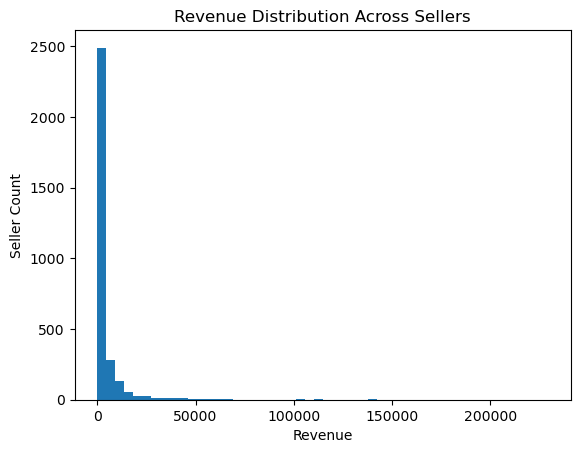

In [218]:
seller_revenue['price'].describe()
# histogram
import matplotlib.pyplot as plt
plt.hist(seller_revenue['price'], bins=50)
plt.title("Revenue Distribution Across Sellers")
plt.xlabel("Revenue")
plt.ylabel("Seller Count")
plt.show()


In [220]:
seller_revenue.to_csv("seller_revenue_by_state.csv", index=False)
sellers_per_state.to_csv("sellers_per_state.csv", index=False)
state_revenue.to_csv("revenue_per_state.csv", index=False)


In [222]:
sales_data.to_csv("sales_data_with_payment_features.csv", index=False)
